# __All India Hiring Hackathon - Unit Price Prediction *(Ranked 86th out of 5K+ participant)*__


In [1]:
# Import required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib # For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")

# Magic Functions for In-Notebook Display

%matplotlib inline

# Import algorithms required for modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Import Metric used in the hackathon for accuracy purpose

from sklearn.metrics import mean_squared_error

Pandas Version : Pandas 0.25.1
Numpy Version : Numpy 1.16.5
Matplotlib Version : Matplotlib 3.1.1
Seaborn Version : Seaborn 0.9.0


In [2]:
# Import Train and test dataset

df_tr = pd.read_csv('Train.csv')
df_te = pd.read_csv('Test.csv')

## __Exploratory Data Analysis__

In [3]:
df_tr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
# Information of columns in train dataset

df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [5]:
df_tr.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [6]:
df_te.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.137920,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,54.311646,1711.887591,6.726816
min,0.000000,0.000000,0.000000,-9360.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000


In [7]:
# Number of rows and columns in test dataset

df_te.shape

(122049, 7)

In [8]:
# Information of columns in train dataset

df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null object
CustomerID     122049 non-null float64
Country        122049 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [9]:
# Overview of target column

df_tr.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [10]:
# Overview of target column

df_te.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.137920,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,54.311646,1711.887591,6.726816
min,0.000000,0.000000,0.000000,-9360.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000


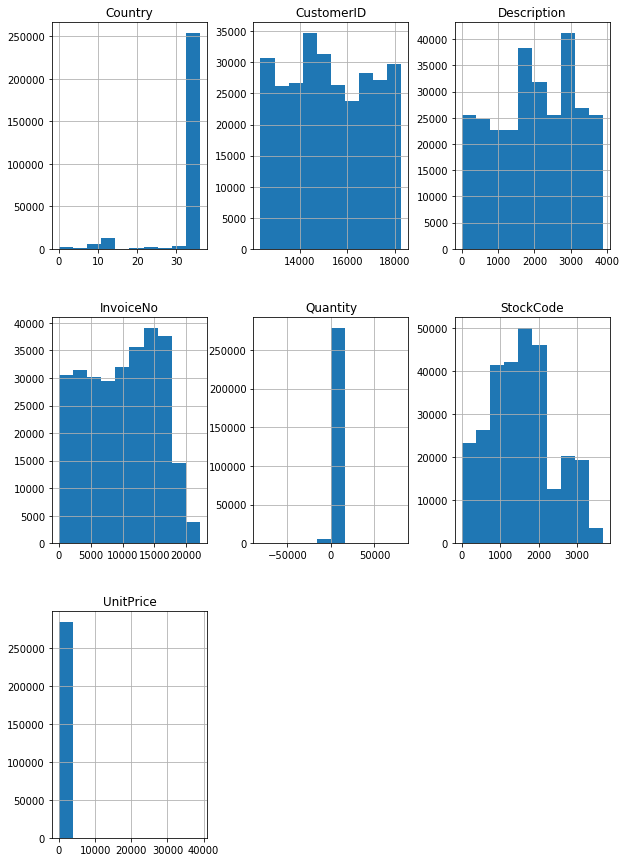

In [11]:
# Visualize variable from training dataset using histogram plot

df_tr.hist(figsize = (10,15))
plt.show()

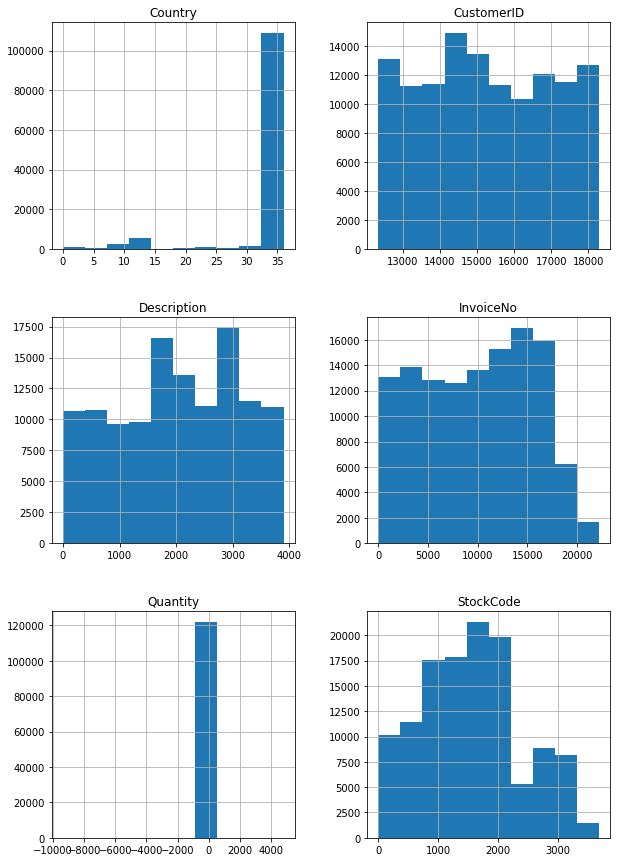

In [12]:
# Visualize variable from test dataset using histogram plot

df_te.hist(figsize = (10,15))
plt.show()

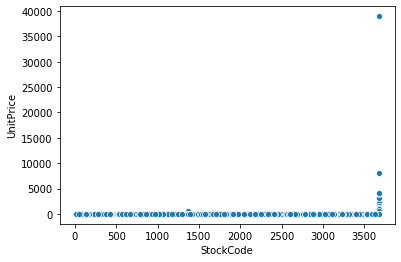

In [13]:
# Check relation between stock code and Unit price using scatter plot

sns.scatterplot(df_tr['StockCode'], df_tr['UnitPrice'])
plt.show()

### __Observations:__

#### * Outlier detected in the unit price
#### * Mostly stocks are below 2000.
#### * Stock codes with above 3500 are more expensives.

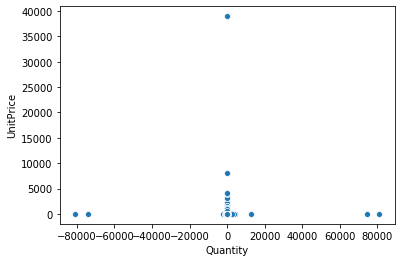

In [14]:
# Number of rows and columns in train dataset

sns.scatterplot(df_tr.Quantity, df_tr.UnitPrice)
plt.show()

### __Observations:__

#### * Quantities have both positive and negative values.
#### * Most of the data lies within 10000 range and there are outliers as well.
#### * Higher Unit Price don't have large quantity.
#### * There are outliers in the target variable which we will fix ahead for better result.

In [15]:
# There are some rows with unit price $0. lets check them:

df_tr.loc[df_tr['UnitPrice'] == 0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15291,15305,3681,2140,1,2011-11-03 13:24:00,0.0,12437.0,13
26477,17360,3034,248,12540,2011-11-25 15:57:00,0.0,13256.0,35
35916,10019,1805,1738,11,2011-07-28 17:09:00,0.0,12507.0,30
47866,16621,1330,1585,4,2011-11-17 19:52:00,0.0,15602.0,35
57601,13438,1631,1434,2,2011-10-06 08:17:00,0.0,15804.0,35
63583,15625,1746,695,1,2011-11-07 16:34:00,0.0,13985.0,35
71639,1356,1292,2780,10,2010-12-21 13:45:00,0.0,14911.0,10
95323,15881,992,2320,24,2011-11-10 11:49:00,0.0,13081.0,35
112680,16689,2220,3006,2,2011-11-18 13:23:00,0.0,12444.0,24
120752,10575,1992,3082,240,2011-08-11 11:42:00,0.0,14911.0,10


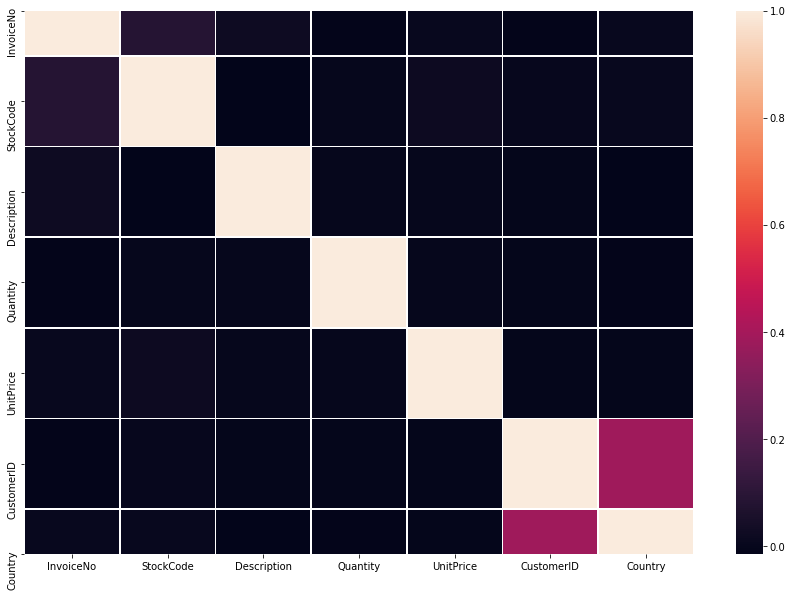

In [16]:
# Check coorelation between variables using heat map

corr_matrix = df_tr.corr()
plot = plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, linewidths = 0.5)
plt.show()

### __Observation:__

####   - __We can hardly find any correlation of independent variables with target variable.__

## __Modeling__

In [17]:
# Drop InvoiceNo and InvoiceDate column from train and test dataset as it contains continuous variable.

df_tr.drop(columns = ['InvoiceNo', 'InvoiceDate'], axis=1, inplace=True)
df_te.drop(columns = ['InvoiceNo', 'InvoiceDate'], axis=1, inplace=True)

In [18]:
# Drop duplicate entries

df_tr.drop_duplicates(inplace=True)

In [19]:
df_tr2 = df_tr

In [20]:
# Assign quantile 1 and quantile 3 in quantity column and set the upper and lower limit to remove the outlier

Q1 = df_tr['UnitPrice'].quantile(0.25)
Q3 = df_tr['UnitPrice'].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 3* IQR
upper_limit = Q3 + 3* IQR

print ('IQR - {} '.format(IQR))
print('Upper_limit - {}'.format(upper_limit))
print('Lower_limit - {}'.format(lower_limit))


IQR - 2.5 
Upper_limit - 11.25
Lower_limit - -6.25


### Multiplied IQR with more bigger numbers to expand the range of data to kept for machine to learn ut found that lower values are giving better results and hence kept the coefficient of __IQR as 3__.

In [21]:
# Remove outlier from quantity column

df_tr1 = df_tr.drop(df_tr[(df_tr['UnitPrice'] < lower_limit) | (df_tr['UnitPrice'] > upper_limit)].index)

In [22]:
# Rows after removing outlier

df_tr1.shape

(237220, 6)

In [23]:
# Assign target and independent variable to X and y

y = df_tr1['UnitPrice'].values
X = df_tr1.drop(columns='UnitPrice')

print(X.shape)
print(y.shape)

(237220, 5)
(237220,)


In [24]:
# Split data using train test split with test size 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 786)

In [25]:
# Gradient Boosting Regressor is used to train data

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
# Predict the target variable from splitted 20% test dataset

y_pred1 = gbr.predict(X_test)

In [27]:
# Accuracy using Mean Squared Error

mean_squared_error(y_test,y_pred1, squared=False)

1.6337184821885211

In [28]:
# Assign the predicted values of test dataset

result1 = gbr.predict(df_te)

In [29]:
# Round off the predicted values with two decimle points

result2 = pd.DataFrame(result1).round(2)
result2.head()

,0
0,3.72
1,2.49
2,1.32
3,3.79
4,2.88


## __Conclusion__:

* Tried multiple regression algorithm and found gradient boosting regressor as the best fit.
* There were outliers in the Unit Price (target) column and hence removed the same to model to learn properly from the data.
* Able to achieve __MSE of 1.63__.